In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [2]:
#from platform import python_version
#python_version()

In [3]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [4]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'Calibracoes_Teste'

## Getting RA&DEC from Bica 2019

In [5]:
ra, dec = 166.4170 ,-58.7070 

## Querying the data

In [6]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [7]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [8]:
query = """SELECT 
ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.1))'

In [9]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [10]:
data = job.get_results()
len(data)

11336

In [11]:
#data

## Converting to pandas

In [12]:
df = data.to_pandas()
df

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,166.605740,-58.694588,NaN,NaN,NaN,NaN,0.982676,20.494425,NaN,NaN,NaN,NaN,289.639782,1.440418
1,166.603729,-58.694684,-7.801574,0.019387,1.385256,0.018895,0.938339,14.278825,0.447856,0.017454,NaN,NaN,289.638859,1.439918
2,166.608041,-58.696105,-11.585444,0.804450,5.153626,0.598385,1.172049,20.172073,0.414884,0.708573,NaN,NaN,289.641479,1.439494
3,166.601775,-58.693601,-5.458543,0.261779,2.980873,0.273705,1.154734,19.041073,0.259749,0.262380,NaN,NaN,289.637499,1.440513
4,166.606143,-58.693170,-8.085729,0.333999,1.233022,0.285894,1.715763,19.383976,-0.612482,0.342520,NaN,NaN,289.639416,1.441804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,166.313998,-58.623501,NaN,NaN,NaN,NaN,1.999107,21.013449,NaN,NaN,NaN,NaN,289.472241,1.445632
11332,166.330091,-58.624500,-6.840868,1.696661,2.423064,2.229257,1.527903,20.858816,-1.183118,1.636083,NaN,NaN,289.480329,1.448048
11333,166.331159,-58.625471,-8.448133,1.153598,0.347346,0.824714,1.759398,20.352343,-0.713094,0.925946,NaN,NaN,289.481225,1.447378
11334,166.329938,-58.619452,-6.575059,0.422578,0.359678,0.426869,2.020350,20.019310,0.912484,0.388747,NaN,NaN,289.478247,1.452648


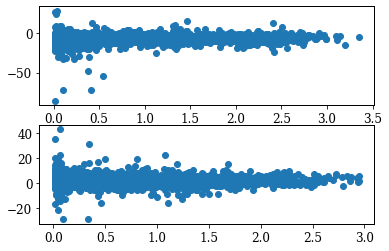

In [13]:
fig, ax = plt.subplots(2)

ax[0].scatter(df.pmra_error,df.pmra)
ax[1].scatter(df.pmdec_error,df.pmdec)

In [14]:
print(np.mean(df.pmdec), np.mean(df.pmdec_error)) ## por que pmra tem um erro muito maior?
print(np.mean(df.pmra), np.mean(df.pmra_error))

2.1956835401476127 0.4523087441921234
-6.425540122436276 0.5266265869140625


## Dropping uknown values of pmra, pmdec or parallax.

In [15]:
ndf = df.dropna(how='any',subset=['pmra', 'pmdec', 'parallax'])
ndf

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
1,166.603729,-58.694684,-7.801574,0.019387,1.385256,0.018895,0.938339,14.278825,0.447856,0.017454,NaN,NaN,289.638859,1.439918
2,166.608041,-58.696105,-11.585444,0.804450,5.153626,0.598385,1.172049,20.172073,0.414884,0.708573,NaN,NaN,289.641479,1.439494
3,166.601775,-58.693601,-5.458543,0.261779,2.980873,0.273705,1.154734,19.041073,0.259749,0.262380,NaN,NaN,289.637499,1.440513
4,166.606143,-58.693170,-8.085729,0.333999,1.233022,0.285894,1.715763,19.383976,-0.612482,0.342520,NaN,NaN,289.639416,1.441804
5,166.603393,-58.691065,-5.036854,0.638017,3.148252,0.662223,1.511465,19.496832,1.897123,0.654241,NaN,NaN,289.637273,1.443175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,166.320192,-58.631162,-6.149196,1.401472,3.238832,1.128666,1.646616,20.693804,-0.982219,1.174176,NaN,NaN,289.478249,1.439886
11332,166.330091,-58.624500,-6.840868,1.696661,2.423064,2.229257,1.527903,20.858816,-1.183118,1.636083,NaN,NaN,289.480329,1.448048
11333,166.331159,-58.625471,-8.448133,1.153598,0.347346,0.824714,1.759398,20.352343,-0.713094,0.925946,NaN,NaN,289.481225,1.447378
11334,166.329938,-58.619452,-6.575059,0.422578,0.359678,0.426869,2.020350,20.019310,0.912484,0.388747,NaN,NaN,289.478247,1.452648


In [16]:
x = ndf['pmra']
y = ndf['pmdec']

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler

## Creating the arrays to perform the 2-D KNN fit and 5-D DBSCAN fit

In [18]:
X = np.dstack((ndf['pmra'],ndf['pmdec']))[0]
cincoD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]

## Performing the KNN on the pmra and pmdec.

0.4173267762175004


<Figure size 360x360 with 0 Axes>

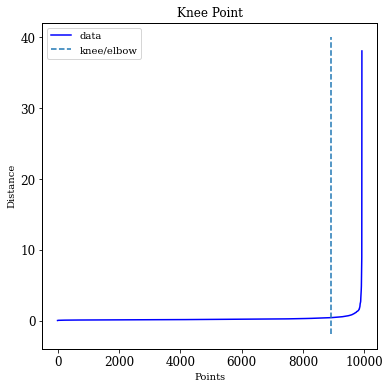

In [19]:
from sklearn.neighbors import NearestNeighbors
vizinhos = 100
nn = NearestNeighbors(n_neighbors=vizinhos).fit(cincoD)
distances, indices = nn.kneighbors(cincoD)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


eps_opt = distances[knee.knee]
nmin = int(0.005*len(data))

print(distances[knee.knee])

In [20]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Performing DBSCAN

Estimated no. of clusters: 1
Estimated no. of noise points: 5491
Estimated no. points clustered: 4432


Text(0, 0.5, 'pmdec')

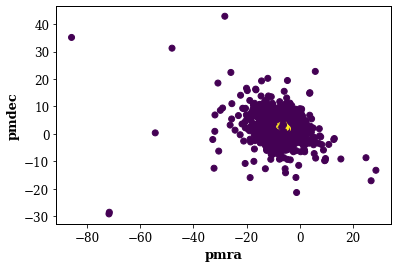

In [21]:
db = DBSCAN(eps=eps_opt, min_samples=100).fit(cincoD)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(db.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)


plt.scatter(X[:, 0], 
            X[:, 1], 
            c=db.labels_, 
            )
plt.xlabel("pmra", fontweight = 'bold')
plt.ylabel("pmdec", fontweight = 'bold')

## Getting the points that are clustered

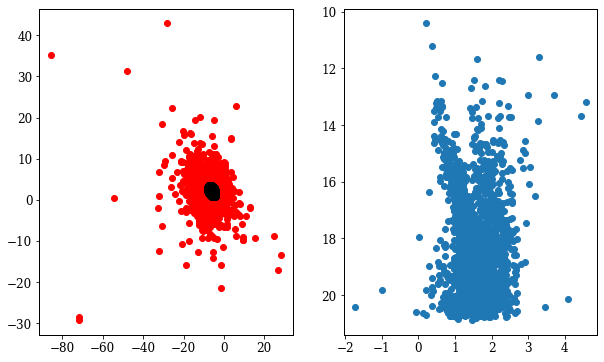

In [22]:
pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==0:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue

xin,yin = pontos_cluster.T

pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==-1:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue


xout, yout = pontos_cluster.T


subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]
subset = subset.reset_index(drop=True)

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].scatter(xin,yin, color = 'k', zorder = 100)
ax[0].scatter(xout,yout, color = 'red')


ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


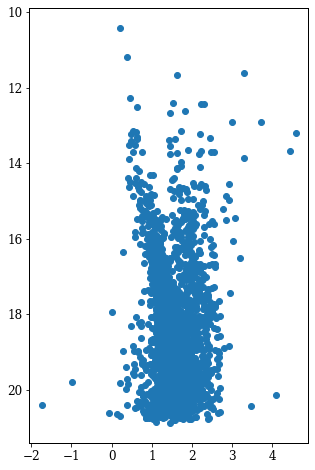

In [23]:
plt.figure(figsize=(5,8))
plt.scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

## Constructing a RDP and histograms of the clusters parameters

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

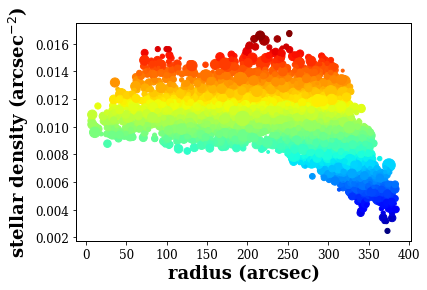

In [24]:
from astropy.coordinates import SkyCoord
from astropy import units

catalog = SkyCoord(ra=subset['ra']*units.degree, dec=subset['dec']*units.degree, frame='fk5')

nstar = len(subset)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([subset['ra']*np.cos(subset['dec']*np.pi/180.0), subset['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(subset['ra'], weights=den_data)
std_x = np.average((subset['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(subset['dec'], weights=den_data)
std_y = np.average((subset['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



## Plotting histograms

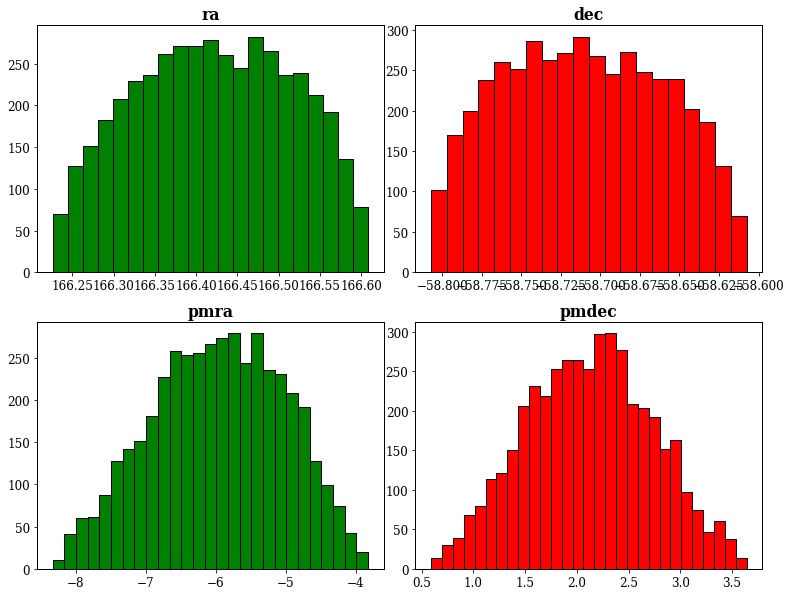

In [25]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


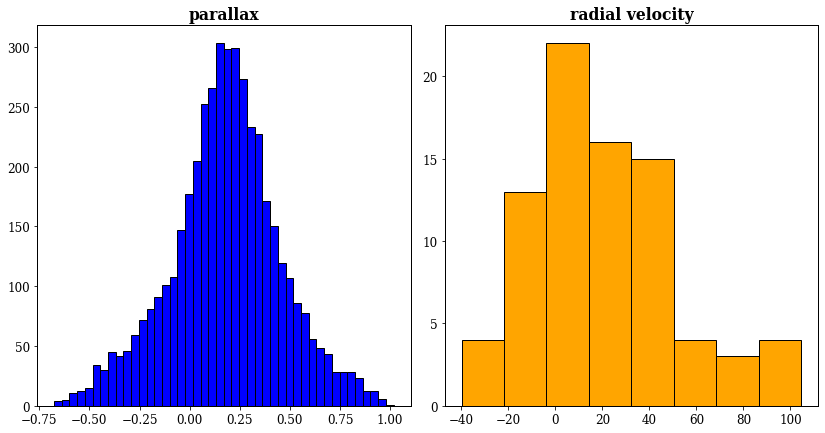

In [26]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Gaussian fit

In [27]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 44
    # variables        = 3
    chi-square         = 12578.1939
    reduced chi-square = 306.785218
    Akaike info crit   = 254.843334
    Bayesian info crit = 260.195903
[[Variables]]
    amplitude:  164.964892 +/- 3.90272943 (2.37%) (init = 178.4695)
    center:     0.18895045 +/- 0.00647397 (3.43%) (init = 0.1897241)
    sigma:      0.23699379 +/- 0.00647432 (2.73%) (init = 0.1969862)
    fwhm:       0.55807772 +/- 0.01524587 (2.73%) == '2.3548200*sigma'
    height:     277.692819 +/- 6.56959157 (2.37%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


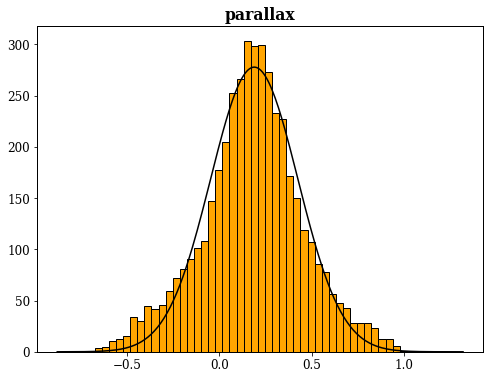

In [28]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(1.3*bins[0],1.3*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

In [29]:
#primeiro_clip = subset.parallax[np.where((subset.parallax < sigma_parallax_up ) & (subset.parallax > sigma_parallax_down))[0]]
#primeiro_clip

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 21
    # variables        = 3
    chi-square         = 7566.20537
    reduced chi-square = 420.344743
    Akaike info crit   = 129.625415
    Bayesian info crit = 132.758982
[[Variables]]
    amplitude:  100.536488 +/- 3.43184060 (3.41%) (init = 91.21922)
    center:     166.426182 +/- 0.00462186 (0.00%) (init = 166.4269)
    sigma:      0.14093033 +/- 0.00630769 (4.48%) (init = 0.1434264)
    fwhm:       0.33186555 +/- 0.01485348 (4.48%) == '2.3548200*sigma'
    height:     284.596360 +/- 7.62709748 (2.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.802


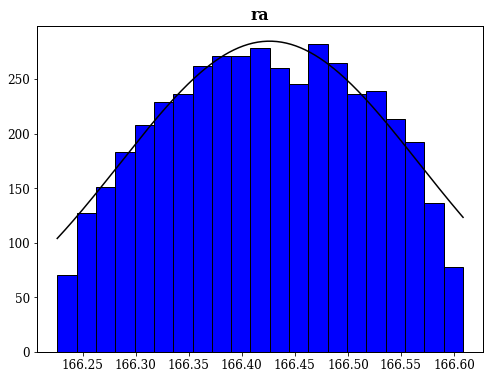

In [30]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 27
    # variables        = 3
    chi-square         = 7375.73244
    reduced chi-square = 307.322185
    Akaike info crit   = 157.473068
    Bayesian info crit = 161.360578
[[Variables]]
    amplitude:  806.393637 +/- 18.7307738 (2.32%) (init = 979.4686)
    center:    -5.91023867 +/- 0.02947540 (0.50%) (init = -5.905558)
    sigma:      1.12778884 +/- 0.03160587 (2.80%) (init = 1.213716)
    fwhm:       2.65573972 +/- 0.07442614 (2.80%) == '2.3548200*sigma'
    height:     285.252452 +/- 6.45153217 (2.26%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.625


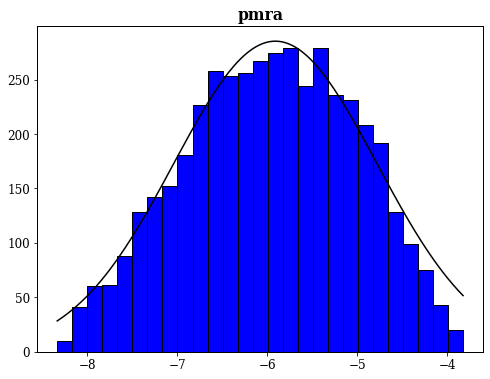

In [31]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 20
    # variables        = 3
    chi-square         = 9798.14329
    reduced chi-square = 576.361370
    Akaike info crit   = 129.884318
    Bayesian info crit = 132.871515
[[Variables]]
    amplitude:  57.2020469 +/- 2.47558173 (4.33%) (init = 52.39235)
    center:    -58.7137991 +/- 0.00310665 (0.01%) (init = -58.70725)
    sigma:      0.07898159 +/- 0.00449007 (5.68%) (init = 0.0786672)
    fwhm:       0.18598743 +/- 0.01057331 (5.68%) == '2.3548200*sigma'
    height:     288.932086 +/- 9.01109898 (3.12%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.840
    C(amplitude, center) = -0.127
    C(center, sigma)     = -0.127


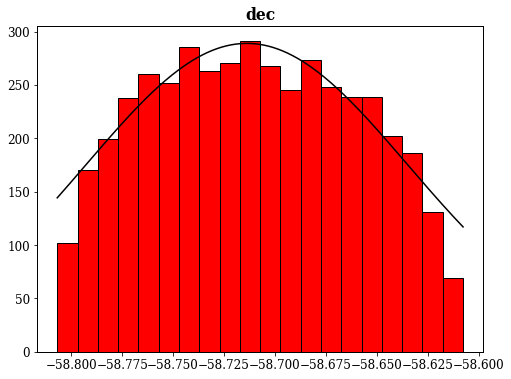

In [32]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 29
    # variables        = 3
    chi-square         = 7125.29245
    reduced chi-square = 274.049710
    Akaike info crit   = 165.619196
    Bayesian info crit = 169.721084
[[Variables]]
    amplitude:  496.536905 +/- 10.7206389 (2.16%) (init = 649.6362)
    center:     2.12041165 +/- 0.01710934 (0.81%) (init = 2.178866)
    sigma:      0.69496864 +/- 0.01773244 (2.55%) (init = 0.7624838)
    fwhm:       1.63652606 +/- 0.04175671 (2.55%) == '2.3548200*sigma'
    height:     285.033831 +/- 6.09168448 (2.14%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.599


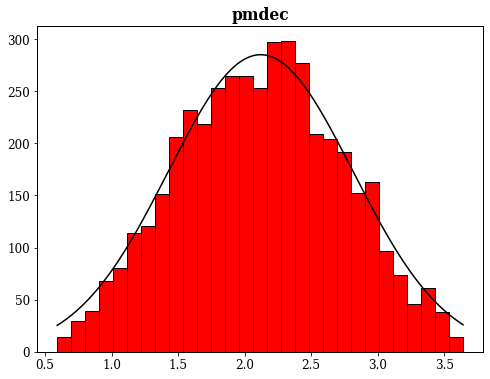

In [33]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 8
    # variables        = 3
    chi-square         = 43.7261556
    reduced chi-square = 8.74523113
    Akaike info crit   = 19.5880393
    Bayesian info crit = 19.8263639
[[Variables]]
    amplitude:  1644.13682 +/- 180.929948 (11.00%) (init = 1765.027)
    center:     11.4417205 +/- 4.01851805 (35.12%) (init = 11.68865)
    sigma:      32.1176823 +/- 4.20340542 (13.09%) (init = 30.96538)
    fwhm:       75.6313607 +/- 9.89826307 (13.09%) == '2.3548200*sigma'
    height:     20.4222620 +/- 2.20945399 (10.82%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.609


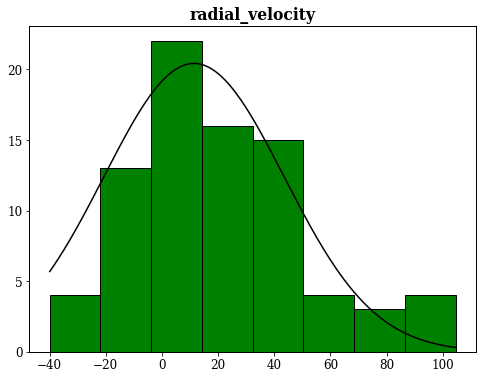

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()


In [35]:
sigma = 10

paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]

print(paralaxe_up,paralaxe_down)

ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]

print(ra_up,ra_down)

pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]

print(pmra_up,pmra_down)

dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]

print(dec_up,dec_down)

pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]

print(pmdec_up,pmdec_down)

radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]

print(radvel_up,radvel_down)

2.558888348559586 -2.180987455078883
167.83548478833913 165.01687826681828
5.36764973695543 -17.18812708384789
-57.92398322848564 -59.503615069189934
9.070098093890271 -4.829274784853604
332.6185437196134 -309.73510262243656


In [36]:
clip = subset.loc[(subset.parallax < paralaxe_up ) & (subset.parallax > paralaxe_down) & (subset.ra>ra_down) & (subset.ra<ra_up)
          & (subset.dec>dec_down) & (subset.dec<dec_up) & (subset.pmra>pmra_down) & (subset.pmra<pmra_up) & (subset.pmdec>pmdec_down) & (subset.pmdec<pmdec_up)
         & (subset.radial_velocity < radvel_up) & (subset.radial_velocity > radvel_down)| (subset.radial_velocity.isnull())]
len(clip)

4432

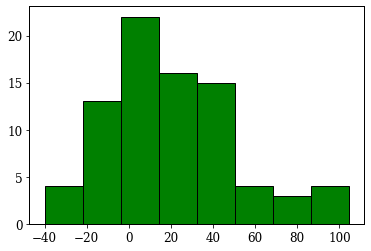

In [37]:
ra_vel = clip.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']

plt.hist(data, optimal_bin, ec = 'k',color = 'green');

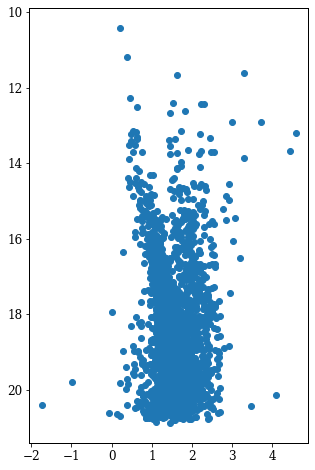

In [38]:
plt.figure(figsize=(5,8))
plt.scatter(clip['bp_rp'],clip['phot_g_mean_mag'])
plt.gca().invert_yaxis()

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

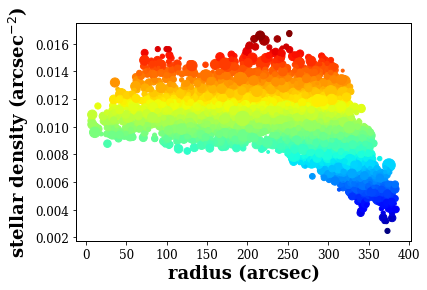

In [39]:
from astropy.coordinates import SkyCoord
from astropy import units

catalog = SkyCoord(ra=clip['ra']*units.degree, dec=clip['dec']*units.degree, frame='fk5')

nstar = len(clip)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip['ra']*np.cos(clip['dec']*np.pi/180.0), clip['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip['ra'], weights=den_data)
std_x = np.average((clip['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip['dec'], weights=den_data)
std_y = np.average((clip['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(clip['phot_g_mean_mag'])-clip['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



In [40]:
center

<SkyCoord (ICRS): (ra, dec) in deg
    (166.42388246, -58.71287295)>

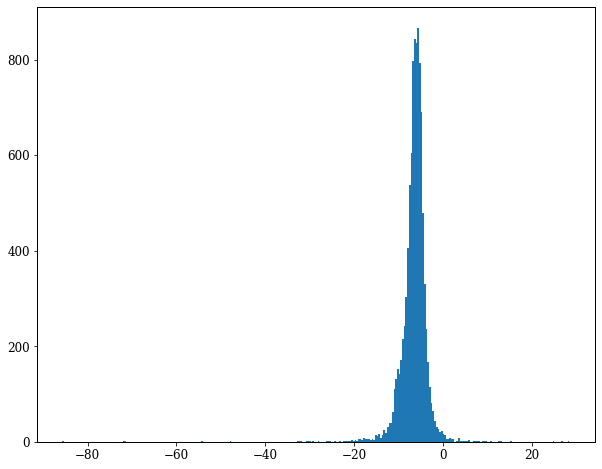

In [43]:
plt.figure(figsize=(10,8))
plt.hist(df.pmra, 300);